# OCR Metrics - CER and WER (Example Notebook)

Example notebook for Medium article - Evaluating OCR Output with CER and WER 

*Highly recommended to run this notebook in Google Colab!*

Link to article:    
Link to GitHub repo: https://github.com/kennethleungty/OCR-Metrics-CER-WER

Author: **Kenneth Leung**

___
### 1. Install and import necessary libraries

In [1]:
!pip install pybind11
!pip install fastwer
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import cv2
import pytesseract
import fastwer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

___
### 2. Simple example of CER calculation

In [3]:
# Define reference text and output text
ref = 'my name is kenneth'
output = 'myy nime iz kenneth'

# Obtain Sentence-Level Character Error Rate (CER)
fastwer.score_sent(output, ref, char_level=True)

16.6667

In [4]:
# Obtain Sentence-Level Word Error Rate (WER)
fastwer.score_sent(output, ref)

75.0

___
### 3. Run TesseractOCR to extract OCR transcribed output

In [5]:
# Show the sample images that we will work on (Need to create a folder to upload sample images in Colab environment)
img_list = os.listdir('./sample_images')
img_list = sorted(img_list)
img_list

['sample_image_1.png', 'sample_image_2.png', 'sample_image_3.png']

Display sample image 1 - sample_image_1.png


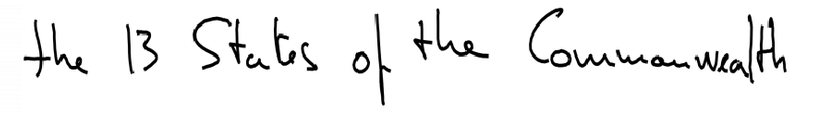

Display sample image 2 - sample_image_2.png


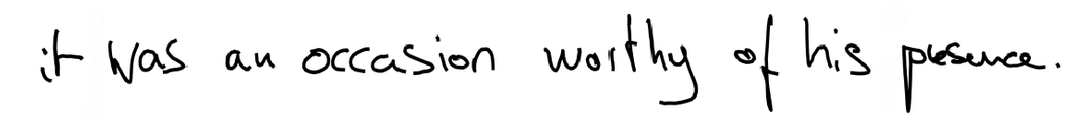

Display sample image 3 - sample_image_3.png


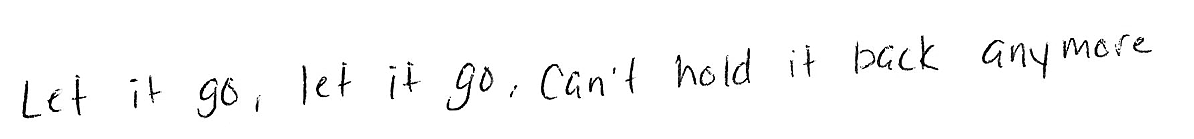

In [6]:
for i, img in enumerate(img_list):
  print(f'Display sample image {i+1} - {img}')
  display(Image(filename=f'./sample_images/{img}'))

In [7]:
# Create empty dataframe to store output
df_output = pd.DataFrame(columns = ['img_filename', 'ocr_output'])

In [8]:
# Loop through sample images
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

for img in img_list:
  im = cv2.imread(f'./sample_images/{img}')
  img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  output = pytesseract.image_to_string(img_rgb, config=custom_config)
  print(output)
  dictionary = {'img_filename':img, 'ocr_output':str(output)}
  df_output = df_output.append(dictionary, ignore_index=True)

Nhe 3 Chak of the, Corsenatalth

‘b YoS an occasion wort hy of Wig po

Let it g6, let it 90; Cand mold it Pack anymore



___
### 4. Manually label ground truth

In [9]:
# Create new columns for reference, CER and WER
df_output['ref_text'] = ''
df_output['cer'] = ''
df_output['wer'] = ''

# Replace new lines in output
df_output['ocr_output'] = df_output['ocr_output'].apply(lambda x: x.replace('\n',''))

df_output.loc[df_output['img_filename'] == 'sample_image_1.png', 'ref_text'] = "the 13 States of the Commonwealth"
df_output.loc[df_output['img_filename'] == 'sample_image_2.png', 'ref_text'] = "it was an occasion worthy of his presence."
df_output.loc[df_output['img_filename'] == 'sample_image_3.png', 'ref_text'] = "Let it go, let it go, can't hold it back anymore"

In [10]:
df_output

,img_filename,ocr_output,ref_text,cer,wer
0,sample_image_1.png,"Nhe 3 Chak of the, Corsenatalth",the 13 States of the Commonwealth,,
1,sample_image_2.png,‘b YoS an occasion wort hy of Wig po,it was an occasion worthy of his presence.,,
2,sample_image_3.png,"Let it g6, let it 90; Cand mold it Pack anymore","Let it go, let it go, can't hold it back anymore",,


___
## 5. Calculate CER and WER

In [11]:
for index, row in df_output.iterrows():
  filename = row['img_filename']
  ref = row['ref_text']
  output = row['ocr_output']
  cer = fastwer.score_sent(output, ref, char_level=True)
  wer = fastwer.score_sent(output, ref, char_level=False)
  df_output.loc[df_output['img_filename'] == filename, 'cer'] = round(cer,2) # Round value to 2 decimal places
  df_output.loc[df_output['img_filename'] == filename, 'wer'] = round(wer,2)

df_output

,img_filename,ocr_output,ref_text,cer,wer
0,sample_image_1.png,"Nhe 3 Chak of the, Corsenatalth",the 13 States of the Commonwealth,42.42,83.33
1,sample_image_2.png,‘b YoS an occasion wort hy of Wig po,it was an occasion worthy of his presence.,42.86,75
2,sample_image_3.png,"Let it g6, let it 90; Cand mold it Pack anymore","Let it go, let it go, can't hold it back anymore",20.83,54.55


In [12]:
# Overall performances
mean_cer = df_output['cer'].mean()
mean_wer = df_output['wer'].mean()
print(f'Mean CER = {mean_cer}%, Mean WER = {mean_wer}%')

Mean CER = 35.37%, Mean WER = 70.96%
